# Getting started 
I will assume that since this is open you at the very least have anaconda installed... and from this you will have some modules called numpy, matplotlib, and scipy, installed 
Now when you run any of the code lines bellow you will need to select a python enviroment to run it in the command

## Using a package
Even though these modules are installed they won't be inside your enviorment (the memory used for executing code)
To bring them into your enviroment you will need to import them
Lets start off by importing two of the most important modules and exploring what they can do for us.

In [2]:
%matplotlib widget
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as c 
import scipy.special as s
from scipy import integrate as i


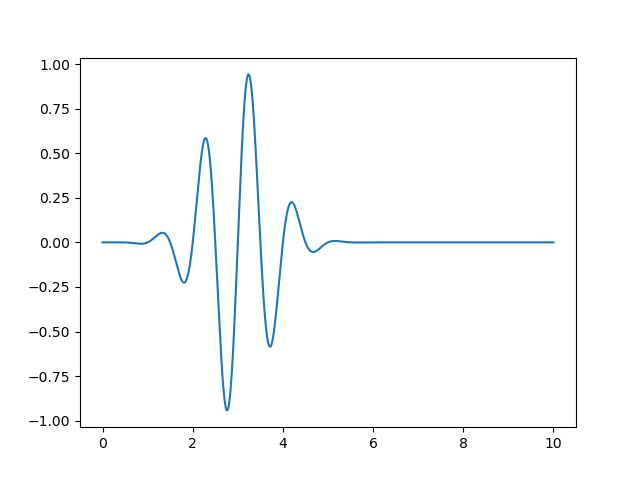

In [3]:
x = np.linspace(0,10,1000)#define a set of 1000 values between 0 and 10
y = np.sin(np.pi*2*x/1)*np.exp(-(x-3)**2)#Define a y function based on those values 
plt.plot(x,y)#plot those values on an unshown figure
plt.show()#show the figure 

The `as` command just gives the module an alias thats quicker to type. 
The precentage sign `%` is used to change notebook settings, in this case it forces the matplotlib package to operate in an interactive mode 
## Numpy 
or numerical python is a package that handles matrices and numerical calculations in python
The `linspace()` command is a function in numpy that jenerates a set of values linearly spaced from a minumum (0) to a maximum (10) in N steps(1000)
Other common functions are also included in numpy such as `sin()`, `cos()`, `exp()`
## matplotlib 
is a package that allows you to plot figures and handle generating videos 
The `plot` command will draw something on a new figure 
The `show` command just forces this figure to be drawn

## Example 1 
To get ourselves used to this lets start off by 
recreating some of the figures in Bruus's book...
#### Figure 1.1c (probability densities) for hydrogen atom

In [26]:
a0 = c.value('Bohr radius') # define the Bohr radius

def a(k,l,n):
    """
    the recursion formula for the radial colomb equation coefficients  
    
    k: order of term 
    l: azimuthal Quantum number  
    n: energy level
    return:
    ak radial coeficient of kth order  
    """
    ak = a0 #lowest order coeffiecent as bohr radius 
    for beta in range(k):
        ak *= (beta+l+1-n)/((beta+1)*(k+2*l+2))
    return  ak 

def rho(r,n,Z):
    """
    Reduced radial coordinate 
    r: radius 
    n: energy level 
    Z: atomic number 
    return:
    rho: reduced radius 
    """
    return 2*r*Z/(n*a0)

def coulomb_funct(r,n,l,Z):
    """
    Radial component of the Hydrogen wave function 
    r: radius 
    n: energy level 
    l: azimuthal quantum number 
    Z: atomic number 
    return 
    R: the radial hydrogen wavefunction 
    """
    
    #define the radial component of the wavefunction 
    R = 0 
    rh=rho(r,n,Z)
    for k in range(n-l-1):
        R += rh**l*a(k,l,n)*rh**k*np.exp(-rh/2)
    return R
def psi(r,th,phi,n,l,m,Z):
    return coulomb_funct(r,n,l,Z)*s.sph_harm(m,l,phi,th)
def prob(x,y,z,n,l,m,Z):
    r = np.sqrt(x**2+y**2+z**2)
    phi = np.arccos(z/r)
    th= np.sign(y)*np.arccos(x/np.sqrt(x**2+y**2))
    return np.abs(psi(r,th,phi,n,l,m,Z))**2

In [27]:
x = np.linspace(-2e-9,2e-9,30)

plt.plot()

[]

The keyword `def` is used here to define a function. Whenever we want to use a function in python our first instinct should be to look for it online to see if anyone has done the hard work for us in this case there wasn't something ready and reliable available so I built something out 

(100000,)


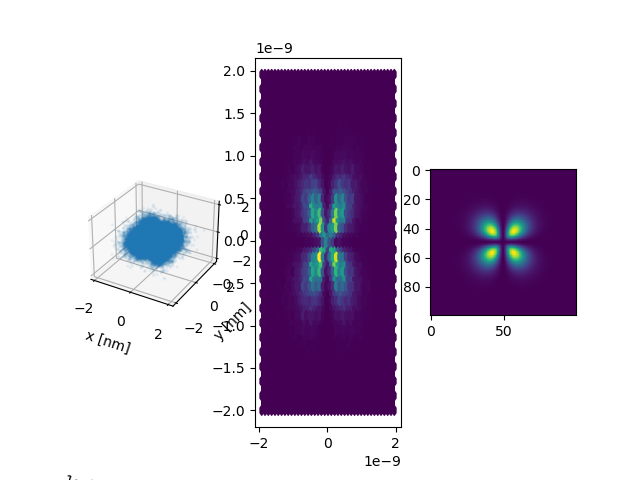

In [59]:
#set the quantum numbers for the system 
n = 4
l = 2
m = 1
#generate x y coordinate space 
x = np.linspace(-2e-9,2e-9,100)
y = np.linspace(-2e-9,2e-9,100)
z = np.linspace(-2e-9,2e-9,100)
#generate meshgrid overlay for that coordinate space 

#create a figure to draw the plot on 
fig =plt.figure()
fig.clear()
ax1 = fig.add_subplot(1,3,1,projection = '3d') #add sub axes to the figure 
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
#Scipy inexplicibly uses th as azimuth, which I took personally 
probability = [prob(xi,yi,zi,n,l,m,1) for xi in x for yi in y for zi in z]
coord = [str((xi,yi,zi)) for xi in x for yi in y for zi in z]
probability= probability/np.sum(probability)
cxyz = np.random.choice(coord,size=100000,replace=True,p=probability)
print(cxyz.shape)
elem_mat = [i.split(',') for i in cxyz]
elem_mat = np.matrix(elem_mat)
X=[float(i.item()[1:]) for i in elem_mat[:,0]]
Y=[float(i.item()) for i in elem_mat[:,1]]
Z=[float(i.item()[0:-1]) for i in elem_mat[:,2]]
ax1.scatter(X,Y,Z,alpha=.05,s=2)
ax1.set_xlabel('x [nm]')
ax1.set_ylabel('y [nm]')
ax1.set_zlabel('z [nm]')
ax2.hexbin(X,Y,gridsize=40)

XX,YY  = np.meshgrid(x,y)
ax3.imshow(prob(XX,YY,0,n,l,m,1))


This set of cells show some alternative plotting techniques, using subplots to allow for 3d plots. 
Now lets explore another slightly more difficult method: 

#### Figure 1.2b (probability densities) for helium atom
To make this a little easier lets first generate a definintion for the 

In [77]:
print(prob(0,.25e-9,.25e-9,4,2,1,2))

0.0


In [25]:
def psi(r,th,phi,n,l,m,Z):
    return coulomb_funct(r,n,l,Z)*s.sph_harm(m,l,phi,th)

def integrand(r2,th2,phi2,r1,th1,phi1,n1,l1,m1,n2,l2,m2,Z):
    return r2**2*np.sin(th2)*np.abs(psi(r1,th1,phi1,n1,l1,m1,Z)*psi(r2,th2,phi2,n2,l2,m2,Z)+psi(r2,th2,phi2,n1,l1,m1,Z)*psi(r1,th1,phi1,n2,l2,m2,Z))**2
def prob(x,y,z,n,l,m,Z):
    r = np.sqrt(x**2+y**2+z**2)
    phi = np.arccos(z/r)
    th= np.sign(y)*np.arccos(x/np.sqrt(x**2+y**2))
    return integrand(0,0,0,r,th,phi,n,l,m,n2=1,l2=0,m2=0,Z=2)
def prob(r1,th1,phi1,n1,n2,l1,l2,m1,m2,Z):
    return i.tplquad(lambda phi, th, rho: integrand(rho,th,phi,r1,th1,phi1,n1,l1,m1,n2,l2,m2,Z),0,r1,lambda th: 0,lambda th: np.pi, lambda th, phi:0,lambda th, phi: np.pi*2,)


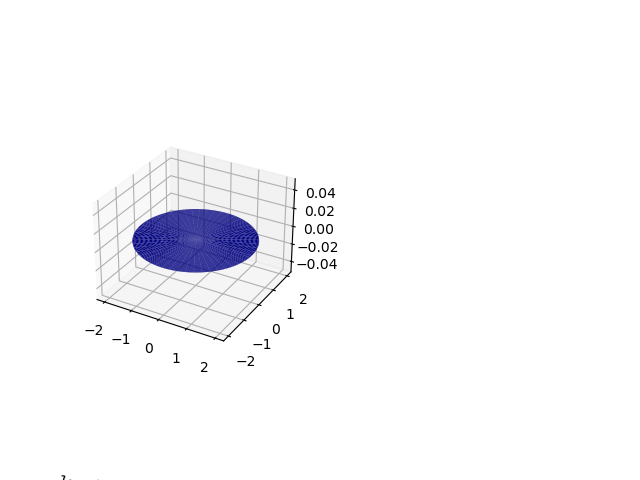

In [28]:
fig =plt.figure()
fig.clear()
ax1 = fig.add_subplot(1,3,1,projection = '3d') #add sub axes to the figure 
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
#Scipy inexplicibly uses th as azimuth, which I took personally 
probability = [prob(xi,yi,zi,n,l,m,1) for xi in x for yi in y for zi in z]
coord = [str((xi,yi,zi)) for xi in x for yi in y for zi in z]
probability= probability/np.sum(probability)
cxyz = np.random.choice(coord,size=100000,replace=True,p=probability)
print(cxyz.shape)
elem_mat = [i.split(',') for i in cxyz]
elem_mat = np.matrix(elem_mat)
X=[float(i.item()[1:]) for i in elem_mat[:,0]]
Y=[float(i.item()) for i in elem_mat[:,1]]
Z=[float(i.item()[0:-1]) for i in elem_mat[:,2]]
ax1.scatter(X,Y,Z,alpha=.05,s=2)
ax1.set_xlabel('x [nm]')
ax1.set_ylabel('y [nm]')
ax1.set_zlabel('z [nm]')
ax2.hexbin(X,Y,gridsize=40)

XX,YY  = np.meshgrid(x,y)
ax3.imshow(prob(XX,YY,0,n,l,m,1))


In [14]:
np.max(z)

0.0